In [54]:
import pandas as pd
import mlflow
import seaborn as sns
import matplotlib.pyplot as plt

from utils import get_metrics


server_uri = "http://127.0.0.1:5001"
experiment_ids = ["314913674266025910"]

df_runs = get_metrics(server_uri, experiment_ids)
df_runs['params.local_structural_feature_list'] = df_runs['params.local_structural_feature_list'].apply(lambda x: eval(x)[0])

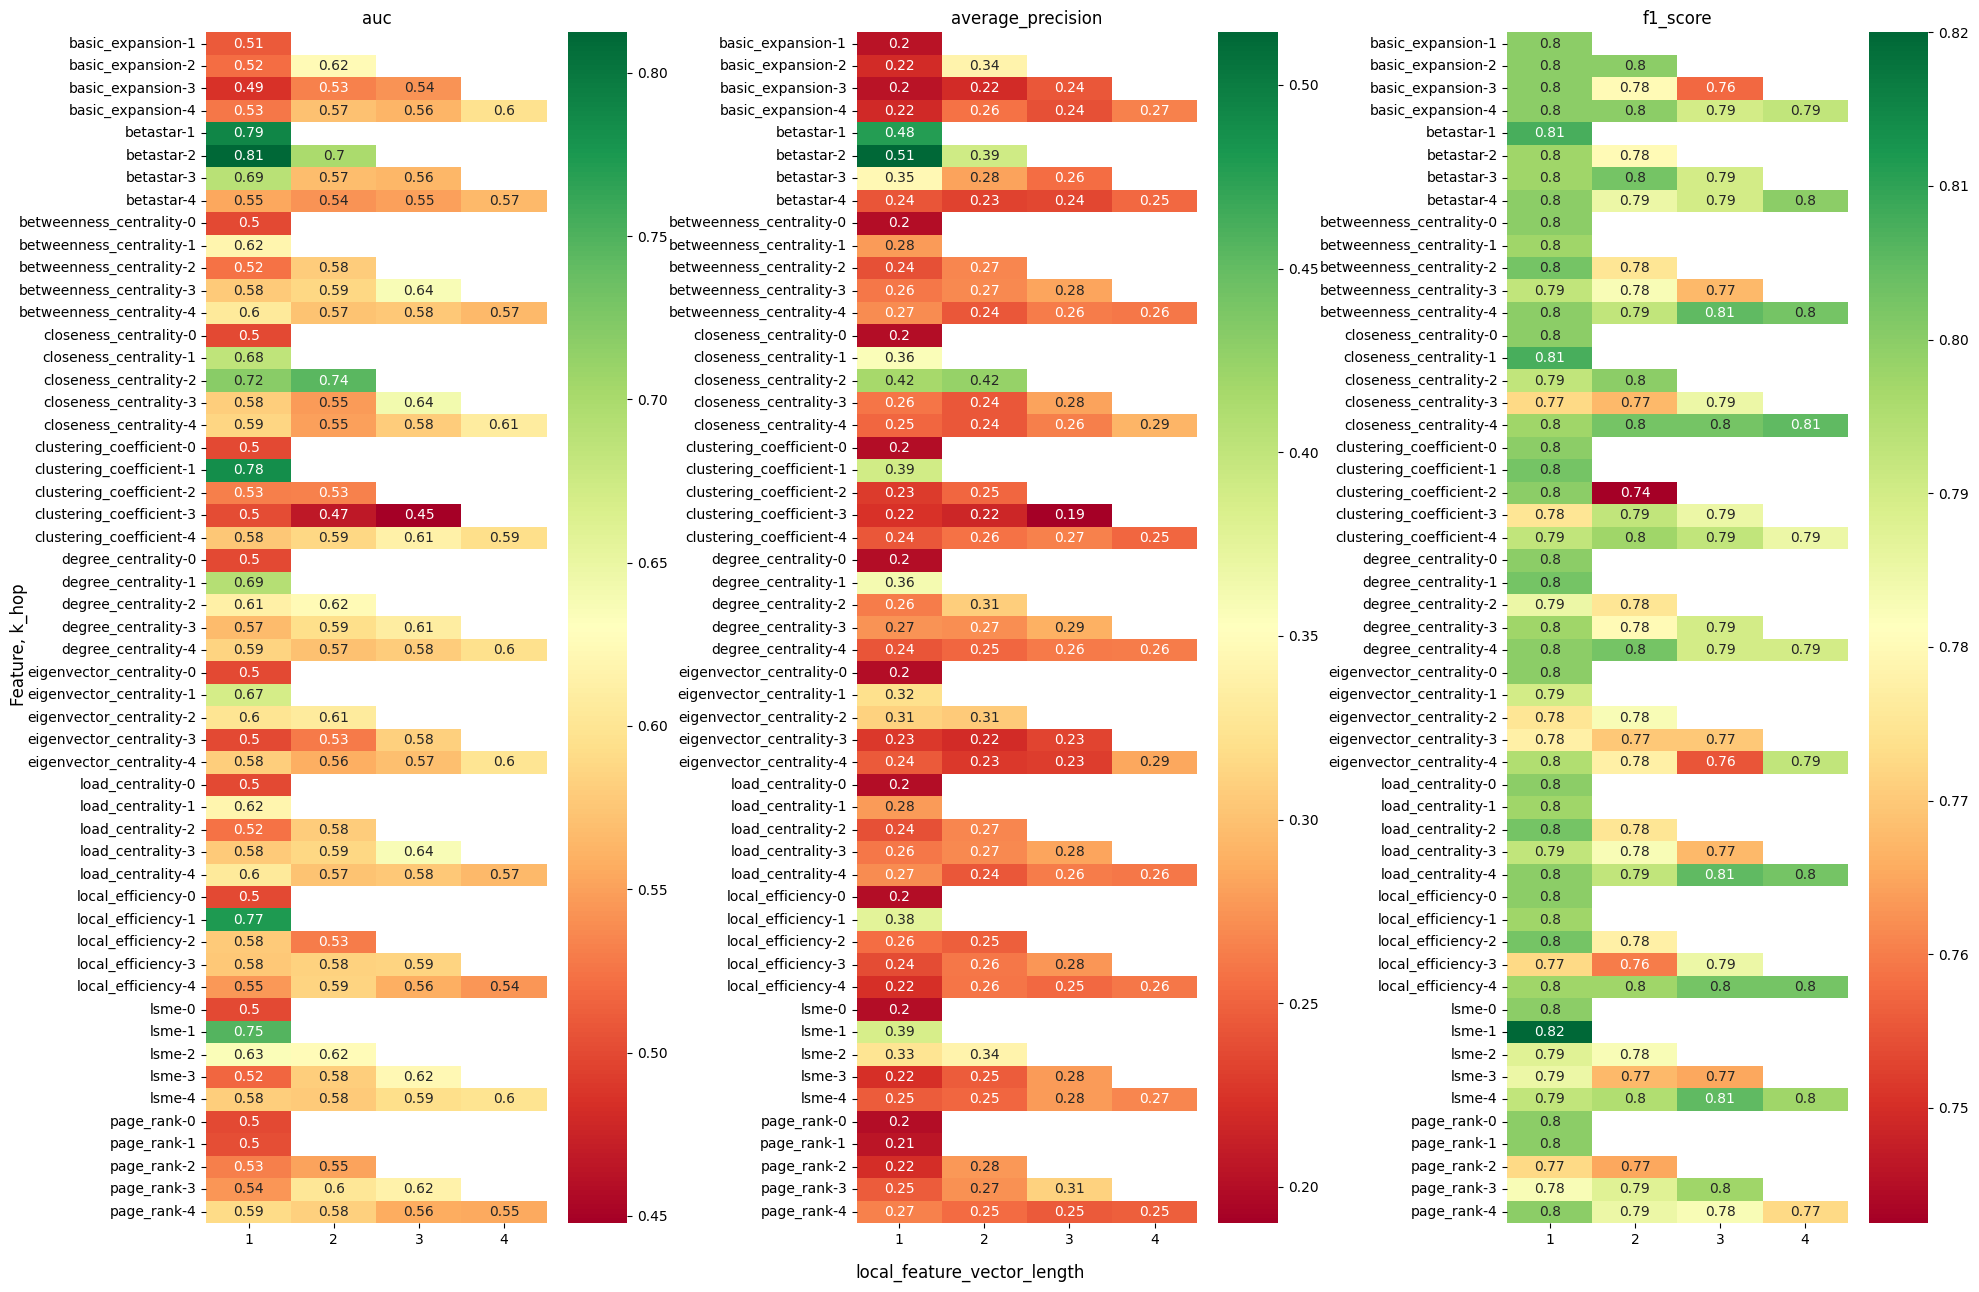

In [55]:
metrics = ['auc', 'average_precision', 'f1_score']
fig, ax = plt.subplots(1, len(metrics), figsize=(20, 13))

for a, metric in zip(ax, metrics):
    x = df_runs.pivot_table(
        index=['params.local_structural_feature_list', 'params.egonet_k_hop'],
        columns='params.local_feature_vector_length',
        values=f'metrics.{metric}',
        aggfunc='mean'
    )

    sns.heatmap(x, ax=a, annot=True, cmap='RdYlGn')
    a.set_xlabel('')
    a.set_ylabel('')
    a.set_title(metric)
fig.supxlabel('local_feature_vector_length')
fig.supylabel('Feature, k_hop')
fig.tight_layout()

In [89]:
grouped = df_runs.groupby('run_id').agg(
    **{i: pd.NamedAgg(column=i, aggfunc='mean') for i in metrics}
).reset_index()

In [93]:
best_auc = grouped.sort_values('auc', ascending=False)['run_id'].tolist()[:10]
best_f1_score = grouped.sort_values('f1_score', ascending=False)['run_id'].tolist()[:10]
best_average_precision = grouped.sort_values('average_precision', ascending=False)['run_id'].tolist()[:10]
# best_auc

In [101]:
x = df_runs[df_runs['run_id'].isin(list(set.union(set(best_auc), set(best_f1_score), set(best_average_precision))))]
x = x[['params.local_structural_feature_list', 'params.egonet_k_hop', 'params.local_feature_vector_length']].drop_duplicates().sort_values(['params.egonet_k_hop', 'params.local_feature_vector_length']).head(11)
# df_runs['params.local_structural_feature_list']

In [108]:
features = x['params.local_structural_feature_list'].unique().tolist()
k_length = [(1, 1), (2, 1), (2, 2)]
features

['degree_centrality',
 'betastar',
 'load_centrality',
 'lsme',
 'local_efficiency',
 'betweenness_centrality',
 'closeness_centrality']